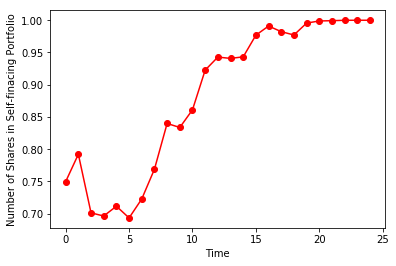

WEEK  TOTAL  STOCK    BOND T_at_END S_at_END B_at_END
  0    7.44  37.48  -30.04     8.55    38.62   -30.06
  1    8.55  40.80  -32.25     6.10    38.37   -32.27
  2    6.10  33.97  -27.87     5.96    33.84   -27.88
  3    5.96  33.61  -27.65     6.21    33.87   -27.66
  4    6.21  34.61  -28.40     5.80    34.22   -28.42
  5    5.80  33.35  -27.55     6.30    33.86   -27.56
  6    6.30  35.30  -29.00     7.18    36.20   -29.02
  7    7.18  38.51  -31.33     8.89    40.24   -31.35
  8    8.89  43.95  -35.06     8.51    43.60   -35.09
  9    8.51  43.27  -34.76     9.18    43.96   -34.78
 10    9.18  45.41  -36.23    11.49    47.74   -36.25
 11   11.49  51.15  -39.66    12.37    52.06   -39.69
 12   12.37  53.20  -40.83    11.78    52.63   -40.86
 13   11.78  52.52  -40.74    11.47    52.23   -40.77
 14   11.47  52.37  -40.90    13.97    54.90   -40.93
 15   13.97  56.86  -42.89    16.03    58.94   -42.91
 16   16.03  59.80  -43.77    13.19    56.98   -43.79
 17   13.19  56.48  -43.29  

In [20]:
# Replicating portfolio - Call

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

S=50; K=45; T=0.5; r=0.03; v=0.30;

n=24; # Weekly rebalance
dt=T/n;
tau=T-0*dt; # Time to maturity

# Initialization
d1=np.zeros(n+1);
d2=np.zeros(n+1);
N_Stock=np.zeros(n+1);
N_Bond=np.zeros(n+1);
STOCK=np.zeros(n+1);
BOND=np.zeros(n+1); 
TOTAL=STOCK+BOND;
STOCK_at_END=np.zeros(n+1);
BOND_at_END=np.zeros(n+1); 
TOTAL_at_END=STOCK_at_END+BOND_at_END;

# Week 0 
d1[0]=(np.log(S/K)+(r+0.5*v**2)*tau)/(v*np.sqrt(tau));
d2[0]=d1[0]-v*np.sqrt(tau);
N_Stock[0]=norm.cdf(d1[0]);
N_Bond[0]=-K*np.exp(-r*tau)*norm.cdf(d2[0]);
STOCK[0]=N_Stock[0]*S;
BOND[0]=N_Bond[0]*1; 
TOTAL[0]=STOCK[0]+BOND[0];

for i in range(0,n): 
    tau=T-i*dt; # Time to maturity
    S=S*np.exp((r-0.5*v**2)*dt+v*np.sqrt(dt)*np.random.normal());
    STOCK_at_END[i]=N_Stock[i]*S;
    BOND_at_END[i]=N_Bond[i]*np.exp(r*dt); 
    TOTAL_at_END[i]=STOCK_at_END[i]+BOND_at_END[i];
    TOTAL[i+1]=TOTAL_at_END[i];
    d1[i+1]=(np.log(S/K)+(r+0.5*v**2)*tau)/(v*np.sqrt(tau));
    d2[i+1]=d1[i+1]-v*np.sqrt(tau);
    N_Stock[i+1]=norm.cdf(d1[i+1]);
    STOCK[i+1]=N_Stock[i+1]*S;
    N_Bond[i+1]=TOTAL[i+1]-STOCK[i+1];
    BOND[i+1]=N_Bond[i+1]; 

S=S*np.exp((r-0.5*v**2)*dt+v*np.sqrt(dt)*np.random.normal());
STOCK_at_END[n]=N_Stock[n]*S;
BOND_at_END[n]=N_Bond[n]*np.exp(r*dt); 
TOTAL_at_END[n]=STOCK_at_END[n]+BOND_at_END[n];

# Number of stocks in replicating portflio
plt.plot(np.arange(0,n+1),N_Stock,'o-r')
plt.xlabel('Time')
plt.ylabel('Number of Shares in Self-finacing Portfolio')
plt.show()


print('WEEK  TOTAL  STOCK    BOND T_at_END S_at_END B_at_END')
msg = '{:3d} {:7.2f} {:6.2f} {:7.2f}  {:7.2f}   {:6.2f}  {:7.2f}'
for i in range(n+1):
    print(msg.format(i, TOTAL[i], STOCK[i], BOND[i], TOTAL_at_END[i], STOCK_at_END[i], BOND_at_END[i]))

In [4]:
%% Replicating portfolio - Put

figure(2)

% Initialization
d1=zeros(1,n+1);
d2=zeros(1,n+1);
N_Stock=zeros(1,n+1);
N_Bond=zeros(1,n+1);
STOCK=zeros(1,n+1);
BOND=zeros(1,n+1); 
TOTAL=STOCK+BOND;
STOCK_at_END=zeros(1,n+1);
BOND_at_END=zeros(1,n+1); 
TOTAL_at_END=STOCK_at_END+BOND_at_END;

% Week 0 
d1(1)=(log(S/K)+(r+0.5*v^2)*tau)/(v*sqrt(tau));
d2(1)=d1(1)-v*sqrt(tau);
N_Stock(1)=-normcdf(-d1(1));  % This line is modified
N_Bond(1)=K*exp(-r*tau)*normcdf(-d2(1));  % This line is modified
STOCK(1)=N_Stock(1)*S;
BOND(1)=N_Bond(1)*1; 
TOTAL(1)=STOCK(1)+BOND(1);

for i=1:n
    tau=T-i*dt; % Time to maturity
    S=S*exp((r-0.5*v^2)*dt+v*sqrt(dt)*randn(1,1));
    STOCK_at_END(i)=N_Stock(i)*S;
    BOND_at_END(i)=N_Bond(i)*exp(r*dt); 
    TOTAL_at_END(i)=STOCK_at_END(i)+BOND_at_END(i);
    TOTAL(i+1)=TOTAL_at_END(i);
    d1(i+1)=(log(S/K)+(r+0.5*v^2)*tau)/(v*sqrt(tau));
    d2(i+1)=d1(i+1)-v*sqrt(tau);
    N_Stock(i+1)=-normcdf(-d1(i+1));  % This line is modified
    STOCK(i+1)=N_Stock(i+1)*S;
    N_Bond(i+1)=TOTAL(i+1)-STOCK(i+1);
    BOND(i+1)=N_Bond(i+1); 
end

S=S*exp((r-0.5*v^2)*dt+v*sqrt(dt)*randn(1,1));
STOCK_at_END(n+1)=N_Stock(n+1)*S;
BOND_at_END(n+1)=N_Bond(n+1)*exp(r*dt); 
TOTAL_at_END(n+1)=STOCK_at_END(n+1)+BOND_at_END(n+1);

% Number of stocks in replicating portflio
plot((0:n),N_Stock,'o-r')
xlabel('Time')
ylabel('Number of Shares in Self-finacing Portfolio')

DATA = [(0:n)' TOTAL' STOCK' BOND' TOTAL_at_END' STOCK_at_END' BOND_at_END']'; 
t = 'WEEK    TOTAL    STOCK      BOND    T_at_END S_at_END  B_at_END\n';
fprintf(t)
fprintf('%3d   %7.2f   %6.2f   %7.2f     %7.2f   %6.2f   %7.2f  \n',DATA)



UsageError: Cell magic `%%` not found.


In [ ]:
%% Replicating portflio - Protective Put
% Protective Put protecting long stock position
% Protective Put = Stock 1 + Put 1

figure(3)

% Initialization
d1=zeros(1,n+1);
d2=zeros(1,n+1);
N_Stock=zeros(1,n+1);
N_Bond=zeros(1,n+1);
STOCK_PRICE=zeros(1,n+1);
STOCK=zeros(1,n+1);
BOND=zeros(1,n+1); 
TOTAL=STOCK+BOND;
STOCK_at_END=zeros(1,n+1);
BOND_at_END=zeros(1,n+1); 
TOTAL_at_END=STOCK_at_END+BOND_at_END;

% Week 0 
d1(1)=(log(S/K)+(r+0.5*v^2)*tau)/(v*sqrt(tau));
d2(1)=d1(1)-v*sqrt(tau);
N_Stock(1)=normcdf(d1(1),0,1);   
N_Bond(1)=K*exp(-r*tau)*normcdf(-d2(1)); % This line is modified 
STOCK_PRICE(1)=S;
STOCK(1)=N_Stock(1)*S;
BOND(1)=N_Bond(1)*1; 
TOTAL(1)=STOCK(1)+BOND(1);

for i=1:n
    tau = T-i*dt; % Time to maturity
    S = S*exp((r-0.5*v^2)*dt+v*sqrt(dt)*randn(1,1));
    STOCK_at_END(i) = N_Stock(i)*S;
    BOND_at_END(i) = N_Bond(i)*exp(r*dt); 
    TOTAL_at_END(i) = STOCK_at_END(i)+BOND_at_END(i);
    TOTAL(i+1) = TOTAL_at_END(i);
    d1(i+1) = (log(S/K)+(r+0.5*v^2)*tau)/(v*sqrt(tau));
    d2(i+1) = d1(i+1) - v*sqrt(tau);
    N_Stock(i+1) = normcdf(d1(i+1)); 
    STOCK_PRICE(i+1) = S;
    STOCK(i+1) = N_Stock(i+1)*S;
    N_Bond(i+1) = TOTAL(i+1)-STOCK(i+1);
    BOND(i+1) = N_Bond(i+1); 
end

S = S*exp((r-0.5*v^2)*dt+v*sqrt(dt)*randn(1,1));
STOCK_at_END(n+1) = N_Stock(n+1)*S;
BOND_at_END(n+1) = N_Bond(n+1)*exp(r*dt); 
TOTAL_at_END(n+1) = STOCK_at_END(n+1)+BOND_at_END(n+1);

subplot(131)
% Stock price
plot((0:n),STOCK_PRICE,'-b'); grid on; xlabel('Time'); ylabel('Stock')

subplot(132)
% Stock price and replicating portflio price
plot((0:n),STOCK_PRICE,'-b',(0:n),TOTAL,'-r'); hold on; grid on
legend('Stock','Protective Put'); xlabel('Time'); ylabel('Protective PUT45')

subplot(133)
% Number of stocks in replicating portflio
plot((0:n),N_Stock,'o-r'); grid on
xlabel('Time'); ylabel('Number of Shares in Protective PUT45')

DATA = [(0:n)' TOTAL' STOCK' BOND' TOTAL_at_END' STOCK_at_END' BOND_at_END']'; 
t = 'WEEK    TOTAL    STOCK      BOND    T_at_END S_at_END  B_at_END\n';
fprintf(t)
fprintf('%3d   %7.2f   %6.2f   %7.2f     %7.2f   %6.2f   %7.2f  \n',DATA)



In [ ]:
%% Replicating portflio - Covered Call
% Covered Call protecting short call position
% Covered Call = Stock 1 + Call -1

figure(4)

% Initialization
d1=zeros(1,n+1);
d2=zeros(1,n+1);
N_Stock=zeros(1,n+1);
N_Bond=zeros(1,n+1);
STOCK_PRICE=zeros(1,n+1);
STOCK=zeros(1,n+1);
BOND=zeros(1,n+1); 
TOTAL=STOCK+BOND;
STOCK_at_END=zeros(1,n+1);
BOND_at_END=zeros(1,n+1); 
TOTAL_at_END=STOCK_at_END+BOND_at_END;

% Week 0 
d1(1) = (log(S/K)+(r+0.5*v^2)*tau)/(v*sqrt(tau));
d2(1) = d1(1) - v*sqrt(tau);
N_Stock(1) = normcdf(-d1(1));   
N_Bond(1) = K*exp(-r*tau)*normcdf(d2(1),0,1); 
STOCK_PRICE(1) = S;
STOCK(1) = N_Stock(1)*S;
BOND(1) = N_Bond(1)*1; 
TOTAL(1) = STOCK(1)+BOND(1);

for i=1:n
    tau = T-i*dt; % Time to maturity
    S = S*exp((r-0.5*v^2)*dt+v*sqrt(dt)*randn(1,1));
    STOCK_at_END(i) = N_Stock(i)*S;
    BOND_at_END(i) = N_Bond(i)*exp(r*dt); 
    TOTAL_at_END(i) = STOCK_at_END(i)+BOND_at_END(i);
    TOTAL(i+1) = TOTAL_at_END(i);
    d1(i+1) = (log(S/K)+(r+0.5*v^2)*tau)/(v*sqrt(tau));
    d2(i+1) = d1(i+1) - v*sqrt(tau);
    N_Stock(i+1) = normcdf(-d1(i+1)); 
    STOCK_PRICE(i+1) = S;
    STOCK(i+1) = N_Stock(i+1)*S;
    N_Bond(i+1) = TOTAL(i+1)-STOCK(i+1);
    BOND(i+1) = N_Bond(i+1); 
end

S = S*exp((r-0.5*v^2)*dt+v*sqrt(dt)*randn(1,1));
STOCK_at_END(n+1) = N_Stock(n+1)*S;
BOND_at_END(n+1) = N_Bond(n+1)*exp(r*dt); 
TOTAL_at_END(n+1) = STOCK_at_END(n+1)+BOND_at_END(n+1);

subplot(131)
% Stock price
plot((0:n),STOCK_PRICE,'-b'); grid on; xlabel('Time'); ylabel('Stock')

subplot(132)
% Stock price and replicating portflio price
plot((0:n),STOCK_PRICE,'-b',(0:n),TOTAL,'-r'); grid on
legend('Stock','Covered Call'); xlabel('Time'); ylabel('Covered Call45')

subplot(133)
% Number of stocks in replicating portflio
plot((0:n),N_Stock,'o-r'); grid on
xlabel('Time'); ylabel('Number of Shares in Covered Call45')

DATA = [(0:n)' TOTAL' STOCK' BOND' TOTAL_at_END' STOCK_at_END' BOND_at_END']'; 
t = 'WEEK    TOTAL    STOCK      BOND    T_at_END S_at_END  B_at_END\n';
fprintf(t)
fprintf('%3d   %7.2f   %6.2f   %7.2f     %7.2f   %6.2f   %7.2f  \n',DATA)
